# Análisis de una fabricación anual de queso camembert usando `Python`

In [40]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [41]:
import seaborn as sns
sns.set_style("whitegrid")

Es necesario cargar el fichero `camembert.csv`en el espacio de trabajo de Google Colaborate. Una vez cargado, verificamos que existe y hay acceso:

In [42]:
# ¡IMPORTANTE! Asegúrate de incluir 'https://'
url_datos = 'https://raw.githubusercontent.com/juanriera/master-queseria/master/datos/camembert.csv'

try:
    df = pd.read_csv(url_datos, decimal = ",", sep=';', encoding='ISO-8859-1')
    print("¡Archivo ", url_datos," cargado correctamente!")
    print(f"Dimensiones de los datos: {df.shape}")
except Exception as e:
    print(f"Error al cargar el archivo: {e}")

¡Archivo  https://raw.githubusercontent.com/juanriera/master-queseria/master/datos/camembert.csv  cargado correctamente!
Dimensiones de los datos: (211, 7)


In [43]:
print(df.head())

        fecha  fabricacion    est    mg    ph  cloruros  coliformes
0  11/01/2020            1  46.68  24.0  4.85      1.50        80.0
1  12/01/2020            1  48.09  25.0  4.67      1.61         0.0
2  13/01/2020            1  45.97  24.0  4.71      1.48      9200.0
3  14/01/2020            1  46.24  23.5  4.78      1.69        20.0
4  15/01/2020            1  45.81  23.0  4.77      1.56       150.0


In [11]:
df.dtypes

,0
fecha,object
fabricacion,int64
est,float64
mg,float64
ph,float64
cloruros,float64
coliformes,float64


<Axes: >

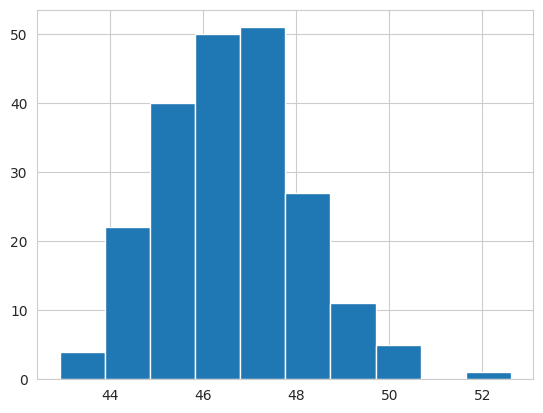

In [12]:
df["est"].hist()

<Axes: >

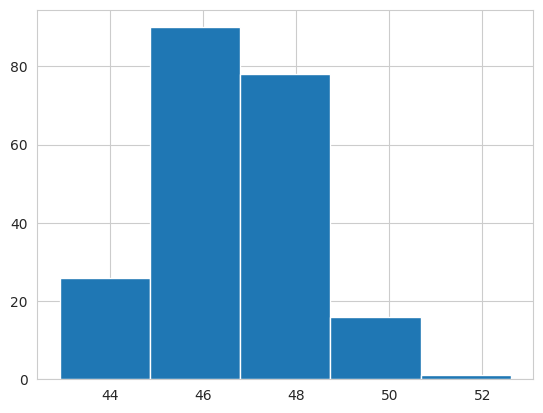

In [13]:
df["est"].hist(bins = 5)

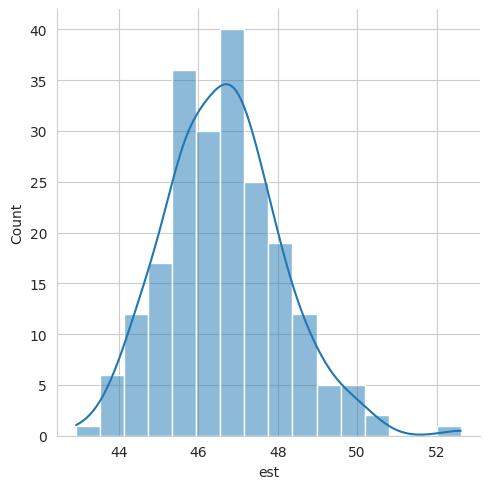

In [14]:
sns.displot(df["est"], kde = True)

<Axes: ylabel='est'>

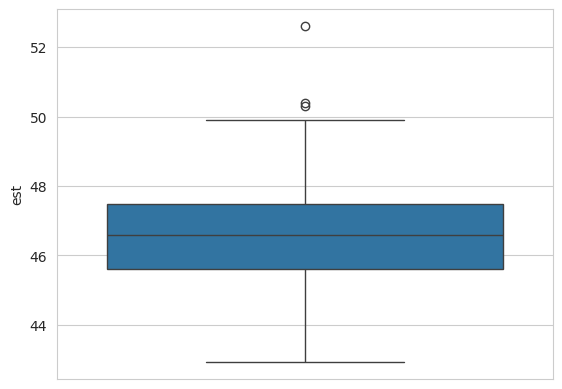

In [15]:
sns.boxplot(df['est'])

In [17]:
df['fecha_index']= pd.DatetimeIndex(df.fecha).normalize()
df.set_index('fecha_index',inplace=True)
df.sort_index(inplace=True)

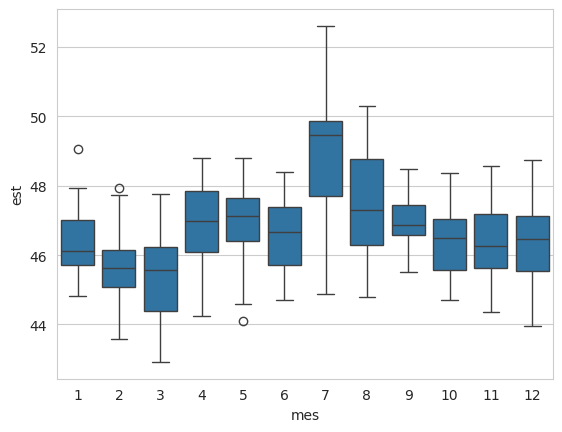

In [19]:
df['mes'] = df.index.month
sns.boxplot(x='mes', y='est', data=df)
plt.show()

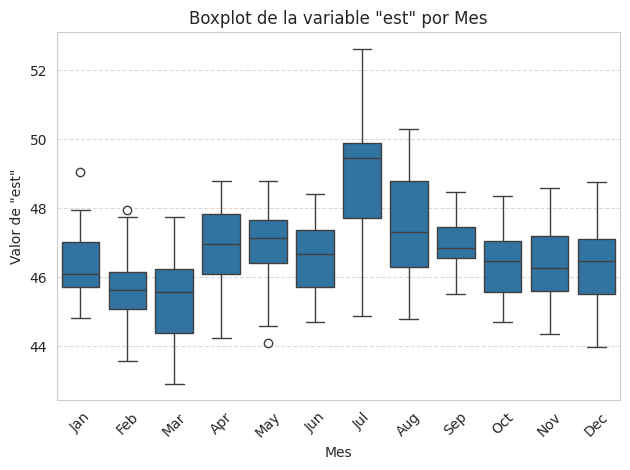

In [20]:
df['mes_abreviado'] = df.index.strftime('%b')
sns.boxplot(x='mes_abreviado', y='est', data=df)
# Opcional: Personalizar el gráfico
plt.title('Boxplot de la variable "est" por Mes')
plt.xlabel('Mes')
plt.ylabel('Valor de "est"')
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añadir una cuadrícula para mejor lectura
plt.xticks(rotation=45) # Rotar las etiquetas del eje X si son muchas
plt.tight_layout() # Ajusta automáticamente los parámetros de la subtrama para un diseño ajustado

plt.show()


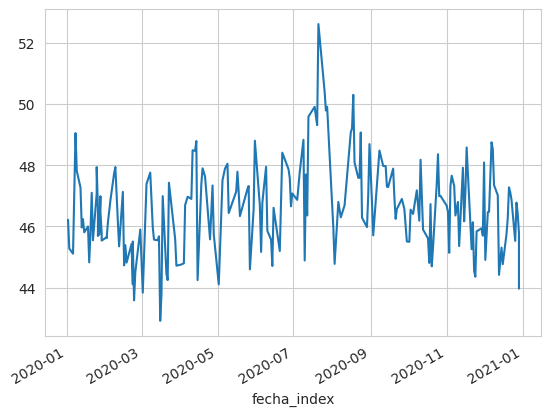

In [22]:
df["est"].plot()
plt.show()

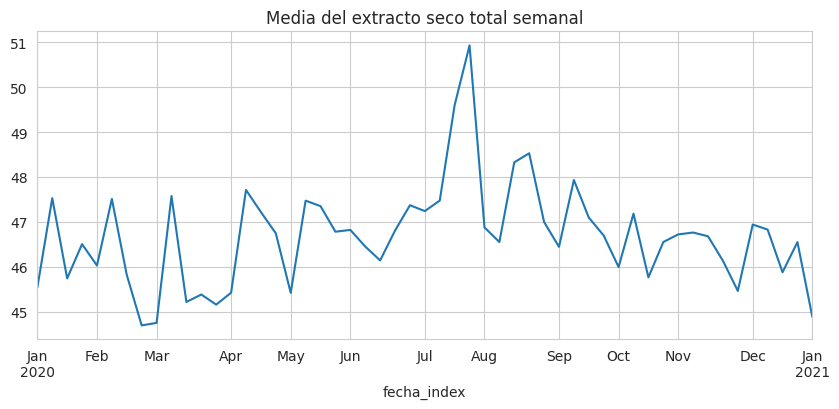

In [23]:
plt.rcParams['figure.figsize'] = (10.0,4.0)
ts = pd.Series(df["est"].dropna())
ts.resample('W-MON').mean().plot(title="Media del extracto seco total semanal")
plt.show()

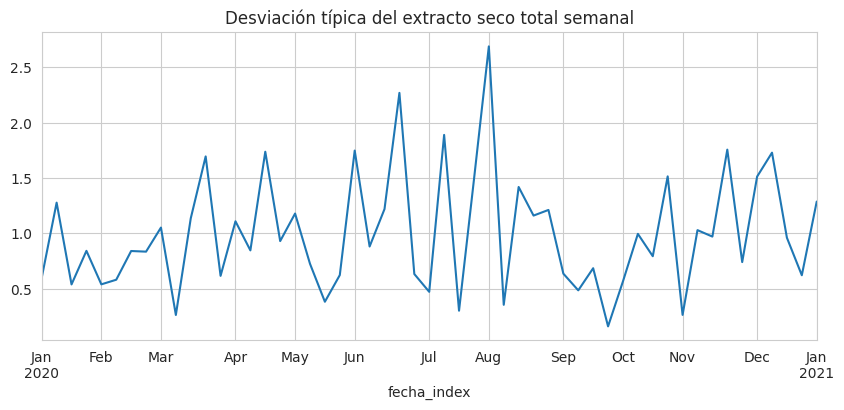

In [24]:
ts.resample('W-MON').std().plot(title="Desviación típica del extracto seco total semanal")
plt.show()


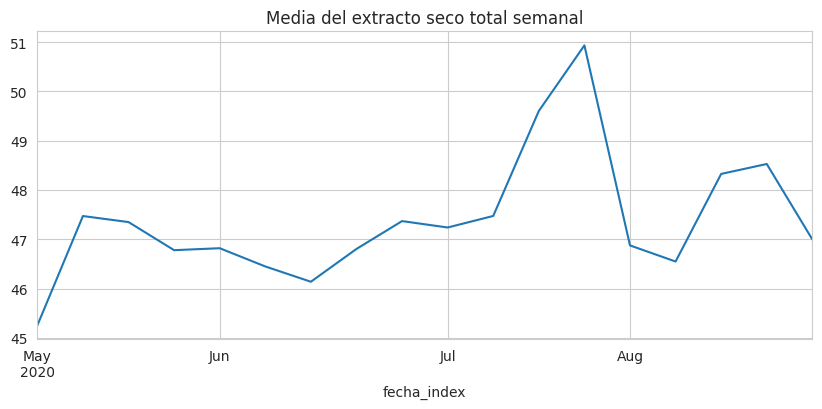

In [25]:
ts["2020-05":"2020-08"].resample('W-MON').mean().plot(title="Media del extracto seco total semanal")
plt.show()


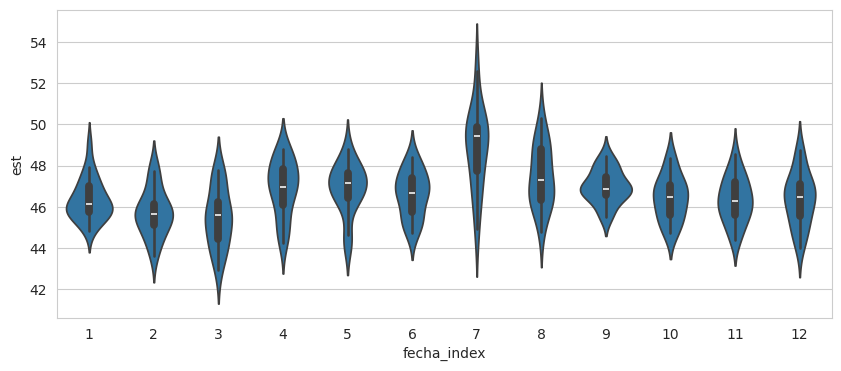

In [26]:
sns.violinplot(y=df["est"], x=df.index.month)
plt.show()

ver https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot

In [30]:
df2 = df.groupby(df.index.isocalendar().week)['est'].agg(['mean', 'std'])

In [31]:
df2.head()

,mean,std
week,,
1,45.7500,0.664680
2,47.3125,1.646134
3,45.7700,0.547494
4,46.5400,0.893476
5,46.0150,0.522986


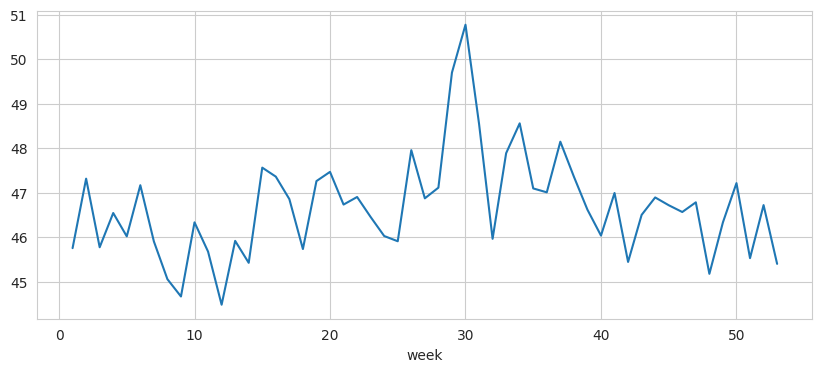

In [33]:
df2['mean'].plot()
plt.show()

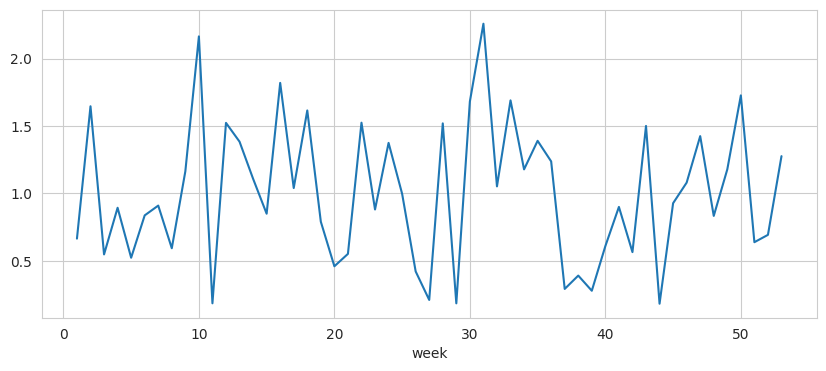

In [35]:
df2['std'].plot()
plt.show()

In [36]:
LSL = df2['mean'] - 3 * df2['std']    ## lower specification limit
USL = df2['mean'] + 3 * df2['std']    ## upper specification limit

df2.insert(2,'LSL', LSL)
df2.insert(3,'USL', USL)

# limite_rechazo = 231    ##
# limite_deficientes = 242    ##
# df3.insert(5,'rechazo', limite_rechazo)
# df3.insert(6,'deficientes', limite_deficientes)


In [37]:
df2.head()

,mean,std,LSL,USL
week,,,,
1,45.7500,0.664680,43.755959,47.744041
2,47.3125,1.646134,42.374097,52.250903
3,45.7700,0.547494,44.127517,47.412483
4,46.5400,0.893476,43.859571,49.220429
5,46.0150,0.522986,44.446042,47.583958


In [38]:
df2['semana'] = df2.index # necesitamos la semana en una columna de valor
df3 = pd.melt(df2, id_vars= ['semana'], value_vars=["mean","LSL", "USL"],  value_name="valores")

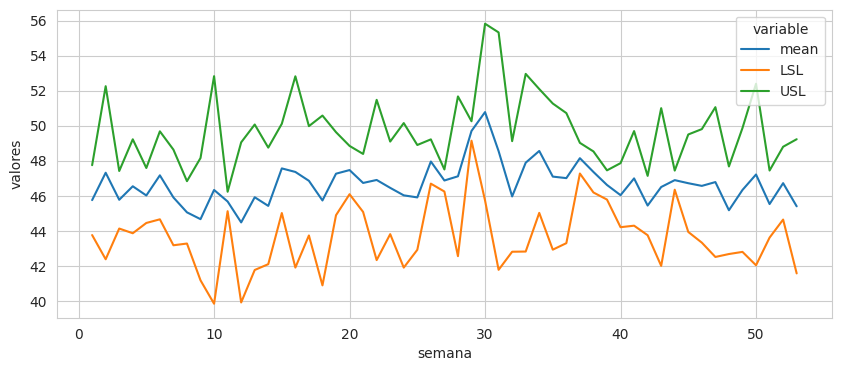

In [39]:
g = sns.lineplot(data=df3, x="semana", y="valores", hue="variable")